### Imports

In [1]:
import chipwhisperer as cw
import matplotlib.pyplot as plt
import numpy as np
import time
import struct
import random

from scipy.signal import find_peaks

### Function Definitions

In [2]:
def random_float(min_val, max_val):
    # Generate a random float between min_val and max_val
    rand_float = random.uniform(min_val, max_val)
    # Round to 2 decimal places
    return round(rand_float, 2)

In [3]:
def float_to_bytearray_32bit_little_edian(f):
    # Pack the float as a 32-bit (4-byte) IEEE 754 floating point number
    packed = struct.pack('f', f)
    # Convert to bytearray
    return bytearray(packed)

In [4]:
def scope_setup(samples=24431, decimate=2):
    # arm the scope
    scope.arm()
    
    # Set the maximum number of points in a trace
    scope.adc.fifo_fill_mode = "normal"
    scope.adc.samples = samples
    scope.adc.decimate = decimate

In [5]:
def capture_trace(cmd_data, cmd='p', prints=True):
    scope.arm()
    # flush the UART buffer
    target.flush()
    
    target.send_cmd(cmd, 0x80, cmd_data)
    ret = scope.capture()
    trace = scope.get_last_trace()
    
    returned_data = target.read_cmd('r')
    ack = target.read_cmd('e')
    if prints:
        print(returned_data)
        print(ack)
    return trace
    

In [6]:
def plot_trace(trace, vlines=[], save=False, fig_name='figure.svg'):
    # Plot the trace
    plt.plot(trace, linewidth=0.8)
    if len(vlines) > 0:
        plt.vlines(vlines, -0.4, 0.3, colors='red')
    if save:
        plt.savefig('figure.svg', format='svg')
    plt.show()

In [7]:
def filter_peaks(arr, old_idxs, level):
    
    if level > 0: 
        a = np.array(arr, dtype=np.float32)
        indices, props = find_peaks(a)
        
        peak_arr = []
        new_idxs = []
        for idx in indices:
            peak_arr.append(arr[idx])
            new_idxs.append(old_idxs[idx])
        
        filtered_indices = filter_peaks(peak_arr, new_idxs, level - 1)
        return filtered_indices
    else: 
        #ret_arr = []
        #for i in range(len(arr)):
        #    ret_arr.append(i)
        #return ret_arr, idxs
        return old_idxs

In [8]:
def find_local_maxima(trace, levels):
    original_indices = []
    for i in range(len(trace)):
        original_indices.append(i)
    return filter_peaks(trace, original_indices, levels)
    


### Target Setup

In [9]:
#Scope setup
scope = cw.scope()
scope.default_setup()

target = cw.target(scope, cw.targets.SimpleSerial2) #cw.targets.SimpleSerial can be omitted
#MY CHANGES - changed target to SimpleSerial2 - to be able to send_cmd

In [10]:
scope_setup(samples=24430, decimate=1)

In [11]:
%%bash
cd version_02/
make PLATFORM='CWLITEARM' CRYPTO_TARGET=NONE

SS_VER set to SS_VER_2_1
rm -f -- simpleserial-target-CWLITEARM.hex
rm -f -- simpleserial-target-CWLITEARM.eep
rm -f -- simpleserial-target-CWLITEARM.cof
rm -f -- simpleserial-target-CWLITEARM.elf
rm -f -- simpleserial-target-CWLITEARM.map
rm -f -- simpleserial-target-CWLITEARM.sym
rm -f -- simpleserial-target-CWLITEARM.lss
rm -f -- objdir/*.o
rm -f -- objdir/*.lst
rm -f -- main.s network.s simpleserial.s stm32f3_hal.s stm32f3_hal_lowlevel.s stm32f3_sysmem.s
rm -f -- main.d network.d simpleserial.d stm32f3_hal.d stm32f3_hal_lowlevel.d stm32f3_sysmem.d
rm -f -- main.i network.i simpleserial.i stm32f3_hal.i stm32f3_hal_lowlevel.i stm32f3_sysmem.i
.
Welcome to another exciting ChipWhisperer target build!!
arm-none-eabi-gcc (GNU Arm Embedded Toolchain 10-2020-q4-major) 10.2.1 20201103 (release)
Copyright (C) 2020 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOS

In file included from main.c:12:
network_config.h:15:6: warning: function declaration isn't a prototype [-Wstrict-prototypes]
   15 | void init_weights() {
      |      ^~~~~~~~~~~~
main.c: In function 'handle':
main.c:49:10: warning: unused variable 'random_dummy_operations_indices' [-Wunused-variable]
   49 |   int ***random_dummy_operations_indices = NULL;
      |          ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


.
Compiling C: network.c
arm-none-eabi-gcc -c -mcpu=cortex-m4 -I. -mthumb -mfloat-abi=soft -fmessage-length=0 -ffunction-sections -gdwarf-2 -DSS_VER=SS_VER_2_1 -DSTM32F303xC -DSTM32F3 -DSTM32 -DDEBUG -DHAL_TYPE=HAL_stm32f3 -DPLATFORM=CWLITEARM -DF_CPU=7372800UL -DSS_VER_2_0=2 -DSS_VER_1_1=1 -DSS_VER_1_0=0 -Os -funsigned-char -funsigned-bitfields -fshort-enums -Wall -Wstrict-prototypes -Wa,-adhlns=objdir/network.lst -I./simpleserial/ -I./hal -I./hal/stm32f3 -I./hal/stm32f3/CMSIS -I./hal/stm32f3/CMSIS/core -I./hal/stm32f3/CMSIS/device -I./hal/stm32f4/Legacy -std=gnu99  -MMD -MP -MF .dep/network.o.d network.c -o objdir/network.o


network.c: In function 'forward_shuffled_NO_AAE_RDO':
network.c:423:13: warning: variable 'result' set but not used [-Wunused-but-set-variable]
  423 |     uint8_t result, scmd = 16;
      |             ^~~~~~
network.c:421:10: warning: variable 'rand_dummy_ops_idx' set but not used [-Wunused-but-set-variable]
  421 |     int *rand_dummy_ops_idx;
      |          ^~~~~~~~~~~~~~~~~~
network.c:415:15: warning: unused variable 'k' [-Wunused-variable]
  415 |     int i, j, k, nidx = 0;
      |               ^
network.c:415:12: warning: unused variable 'j' [-Wunused-variable]
  415 |     int i, j, k, nidx = 0;
      |            ^
network.c:415:9: warning: unused variable 'i' [-Wunused-variable]
  415 |     int i, j, k, nidx = 0;
      |         ^


.
Compiling C: ./simpleserial/simpleserial.c
arm-none-eabi-gcc -c -mcpu=cortex-m4 -I. -mthumb -mfloat-abi=soft -fmessage-length=0 -ffunction-sections -gdwarf-2 -DSS_VER=SS_VER_2_1 -DSTM32F303xC -DSTM32F3 -DSTM32 -DDEBUG -DHAL_TYPE=HAL_stm32f3 -DPLATFORM=CWLITEARM -DF_CPU=7372800UL -DSS_VER_2_0=2 -DSS_VER_1_1=1 -DSS_VER_1_0=0 -Os -funsigned-char -funsigned-bitfields -fshort-enums -Wall -Wstrict-prototypes -Wa,-adhlns=objdir/simpleserial.lst -I./simpleserial/ -I./hal -I./hal/stm32f3 -I./hal/stm32f3/CMSIS -I./hal/stm32f3/CMSIS/core -I./hal/stm32f3/CMSIS/device -I./hal/stm32f4/Legacy -std=gnu99  -MMD -MP -MF .dep/simpleserial.o.d ./simpleserial/simpleserial.c -o objdir/simpleserial.o
.
Compiling C: ./hal/stm32f3/stm32f3_hal.c
arm-none-eabi-gcc -c -mcpu=cortex-m4 -I. -mthumb -mfloat-abi=soft -fmessage-length=0 -ffunction-sections -gdwarf-2 -DSS_VER=SS_VER_2_1 -DSTM32F303xC -DSTM32F3 -DSTM32 -DDEBUG -DHAL_TYPE=HAL_stm32f3 -DPLATFORM=CWLITEARM -DF_CPU=7372800UL -DSS_VER_2_0=2 -DSS_VER_1_1=1 -

In [11]:
cw.program_target(scope, cw.programmers.STM32FProgrammer, "version_02/simpleserial-target-CWLITEARM.hex")

Detected known STMF32: STM32F302xB(C)/303xB(C)
Extended erase (0x44), this can take ten seconds or more
Attempting to program 16167 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 16167 bytes


### Trace Capture Test

In [14]:
float_val = -0.657
float_bytearray = float_to_bytearray_32bit_little_edian(float_val)

data = bytearray([0x42] * 4)
print(data)
print(float_bytearray)

trace_wave = capture_trace(float_bytearray)
trace = cw.Trace(wave=trace_wave, textin=None, textout=None, key=None)

bytearray(b'BBBB')
bytearray(b"\'1(\xbf")
CWbytearray(b'00 72 04 27 31 28 bf 63 00')
CWbytearray(b'00 65 01 00 eb 00')


In [15]:
peak_indices = find_local_maxima(trace_wave, 6)
print(len(peak_indices))

16


In [16]:
print(peak_indices)

[932, 2312, 4000, 5768, 6580, 8056, 9092, 9616, 10664, 12188, 14212, 16176, 17560, 20132, 21728, 22800]


In [21]:
peak_indices[0] = 400
peak_indices[2] = 4400 

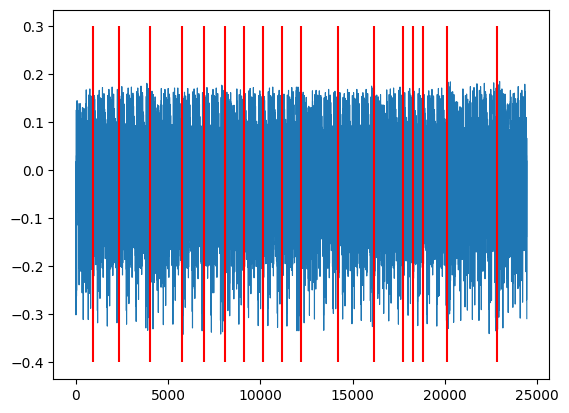

In [16]:
plot_trace(trace_wave, vlines=peak_indices)


### Initialize the project

The Chipwhisperer `Project` class can be used to keep a collection of traces. 

In [22]:
proj = cw.create_project("project-07")

#project-06
num_traces = 2000
min_in_val = -20
max_in_val = 20

#project-07
num_traces = 100000
min_in_val = -20
max_in_val = 20

In [23]:
input_vals = []
# project-05
#for i in range(1000):
#    input_vals.append(random_float(-5, 5))


for i in range(num_traces):
    input_vals.append(random.uniform(min_in_val, max_in_val))


print(max(input_vals))
print(min(input_vals))
print(len(input_vals))

19.99965179081856
-19.999978940682432
100000


In [24]:
start = time.time()
completed_counter = 0
for i in range(num_traces):
    cmd_data = float_to_bytearray_32bit_little_edian(input_vals[i])
    
    trace_wave = capture_trace(cmd_data=cmd_data, prints=False)
    trace = cw.Trace(wave=trace_wave, textin=input_vals[i], textout=None, key=None)
    proj.traces.append(trace)
    
    completed_counter += 1
    if completed_counter % 100 == 0: 
        print(f'completed\t{completed_counter} traces in\t{time.time() - start} seconds' )

end = time.time()
print(end - start)

completed	100 traces in	2.9018328189849854 seconds
completed	200 traces in	5.957069158554077 seconds
completed	300 traces in	9.222504615783691 seconds
completed	400 traces in	12.58650541305542 seconds
completed	500 traces in	15.547364950180054 seconds
completed	600 traces in	17.763543605804443 seconds
completed	700 traces in	19.794128894805908 seconds
completed	800 traces in	21.751596212387085 seconds
completed	900 traces in	23.83538508415222 seconds
completed	1000 traces in	26.822892904281616 seconds
completed	1100 traces in	30.29719614982605 seconds
completed	1200 traces in	33.702723026275635 seconds
completed	1300 traces in	37.041996717453 seconds
completed	1400 traces in	40.27105736732483 seconds
completed	1500 traces in	43.786460399627686 seconds
completed	1600 traces in	48.051902770996094 seconds
completed	1700 traces in	52.64045524597168 seconds
completed	1800 traces in	56.98955225944519 seconds
completed	1900 traces in	61.37443780899048 seconds
completed	2000 traces in	65.66242

completed	16100 traces in	841.2652614116669 seconds
completed	16200 traces in	847.4458613395691 seconds
completed	16300 traces in	853.5548195838928 seconds
completed	16400 traces in	859.6600661277771 seconds
completed	16500 traces in	866.1110808849335 seconds
completed	16600 traces in	872.4127237796783 seconds
completed	16700 traces in	878.8055737018585 seconds
completed	16800 traces in	885.1772592067719 seconds
completed	16900 traces in	891.4792733192444 seconds
completed	17000 traces in	898.0639615058899 seconds
completed	17100 traces in	904.3845808506012 seconds
completed	17200 traces in	910.8075032234192 seconds
completed	17300 traces in	917.1173548698425 seconds
completed	17400 traces in	923.4093518257141 seconds
completed	17500 traces in	930.1078655719757 seconds
completed	17600 traces in	936.8484599590302 seconds
completed	17700 traces in	943.3543627262115 seconds
completed	17800 traces in	949.9166040420532 seconds
completed	17900 traces in	956.41188621521 seconds
completed	1800

completed	31700 traces in	1726.3809504508972 seconds
completed	31800 traces in	1730.4510765075684 seconds
completed	31900 traces in	1734.9908468723297 seconds
completed	32000 traces in	1739.1847887039185 seconds
completed	32100 traces in	1744.0338711738586 seconds
completed	32200 traces in	1748.9092962741852 seconds
completed	32300 traces in	1753.6416234970093 seconds
completed	32400 traces in	1758.0252225399017 seconds
completed	32500 traces in	1762.6555774211884 seconds
completed	32600 traces in	1767.507639169693 seconds
completed	32700 traces in	1771.9868149757385 seconds
completed	32800 traces in	1776.9910423755646 seconds
completed	32900 traces in	1782.2701234817505 seconds
completed	33000 traces in	1787.37757396698 seconds
completed	33100 traces in	1792.6786940097809 seconds
completed	33200 traces in	1797.4713549613953 seconds
completed	33300 traces in	1802.2807259559631 seconds
completed	33400 traces in	1807.1024270057678 seconds
completed	33500 traces in	1811.8881042003632 seco

USBErrorTimeout: LIBUSB_ERROR_TIMEOUT [-7]

In [25]:
proj.save()
proj.close()

In [21]:
proj = cw.open_project("project-06")

In [22]:
print(len(proj.traces))

2000


In [29]:
trace_waves_arr = []
for trace in proj.traces:
    trace_waves_arr.append(trace.wave)